In [1]:
%cd /media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/

/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels


/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:

import pandas as pd
#from functions import *
import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.regression import *

In [18]:
data = pd.read_excel('data/raw/Scorecards_IPS_Brasil_2024_0e5207da26.xlsx',skiprows=0, sheet_name='IPS_Indicadores_Brasil', nrows=5570)
data.head(5)


,cod_mu,cod_municipio,nome_municipio,estado,nome_regiao,capital,Amazônia Legal?,IPS Brasil,Necessidades Humanas Básicas,Fundamentos do Bem-estar,...,Praças e Parques em Áreas Urbanas,Paridade de Gênero na Câmara Municipal,Paridade de Negros e Pardos na Câmara Municipal,Violência Contra Indígenas,Violência Contra Negros,Violência Contra Mulheres,Empregados com Ensino Superior,Mulheres Empregadas com Ensino Superior,Nota Média no Enem,Área do município (km²)
0,110001,1100015,Alta Floresta D'Oeste (RO),RO,Norte,Não,1,50.947109,59.696415,55.020277,...,4.311155,0.201822,0.817760,83.798883,154.202005,544.600939,50.698661,70.814513,545.588235,7067.127
1,110002,1100023,Ariquemes (RO),RO,Norte,Não,1,55.974754,66.456103,62.352941,...,3.520868,0.457490,0.914038,103.092784,187.129639,386.938274,50.778764,69.084119,543.388624,4426.571
2,110003,1100031,Cabixi (RO),RO,Norte,Não,1,51.364540,55.096942,54.275583,...,5.112426,0.449230,0.742219,0.000000,57.971014,151.114469,42.963371,62.500000,472.129333,1314.352
3,110004,1100049,Cacoal (RO),RO,Norte,Não,1,61.845266,73.413193,65.875374,...,2.331740,0.000000,0.826865,101.492537,44.749403,227.759612,55.651300,70.904220,546.466073,3793.000
4,110005,1100056,Cerejeiras (RO),RO,Norte,Não,1,58.708788,65.540396,63.712042,...,1.888015,0.000000,0.550897,0.000000,39.024390,24.925224,44.965597,60.433295,545.902105,2783.300


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 79 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   cod_mu                                                           5570 non-null   float64
 1   cod_municipio                                                    5570 non-null   float64
 2   nome_municipio                                                   5571 non-null   object 
 3   estado                                                           5571 non-null   object 
 4   nome_regiao                                                      5571 non-null   object 
 5   capital                                                          5571 non-null   object 
 6   Amazônia Legal?                                                  5571 non-null   float64
 7   IPS Brasil                                

In [46]:
s = setup(data, target = 'IPS Brasil', session_id=123, train_size=0.7, ignore_features=['cod_mu','od_municipio','nome_municipio','estado','nome_regiao','capital','Amazônia Legal?','Nutrição e Cuidados Médicos Básicos',
       'Água e Saneamento', 'Moradia', 'Segurança Pessoal',
       'Acesso ao Conhecimento Básico', 'Acesso à Informação e Comunicação',
       'Saúde e Bem-estar', 'Qualidade do Meio Ambiente',
       'Direitos Individuais', 'Liberdades Individuais e de Escolhas',
       'Inclusão Social', 'Acesso à Educação Superior',
       'População residente Censo 2022',
       'PIB Real per capita (R$/hab.) 2021 Pop Censo 2022',
       'Mortalidade Infantil até 5 anos',
       'Mortalidade Ajustada por Condições Sensíveis à Atenção Primária',
       'Hospitalizações por Condições Sensíveis à Atenção Primária',
       'Cobertura Vacinal (poliomielite)', 'Subnutrição',
       'Abastecimento de Água Via Rede de Distribuição',
       'Índice de Abastecimento de Água', 'Esgotamento Sanitário Adequado',
       'Índice de Perdas de Água na Distribuição',
       'Domicílios com Coleta de Resíduos Adequada',
       'Domicílios com Iluminação Elétrica Adequada',
       'Domicílios com Paredes Adequadas', 'Domicílios com Pisos Adequados',
       'Mortes por Acidentes de Transporte', 'Homicídios',
       'Assassinatos de Jovens', 'Assassinatos de Mulheres',
       'Evasão no Ensino Médio', 'Distorção Idade-Série no Ensino Médio',
       'Abandono no Ensino Fundamental', 'Abandono no Ensino Médio','Ideb Ensino Fundamental',
       'Densidade de Internet Banda Larga Fixa', 'Densidade Telefonia Móvel',
       'Cobertura de Internet Móvel (4G/5G)', 'Qualidade de Internet Móvel',
       'Expectativa de Vida ', 'Mortalidade entre 15 e 50 anos',
       'Mortalidades por Doenças Crônicas Não Transmissíveis ', 'Suicídios',
       'Obesidade', 'Índice de Vulnerabilidade Climática dos Municípios',
       'Supressão da Vegetação Primária e Secundária', 'Focos de Calor',
       'Emissões de CO2e por Habitante', 'Áreas Verdes Urbanas',
       'Acesso a Programas de Direitos Humanos',
       'Existência de Ações para Direitos de Minorias',
       'Taxa de Congestionamento Líquida de Processos',
       'Índice de Atendimento à Demanda de Justiça',
       'Acesso à Cultura Lazer e Esporte', 'Gravidez na Adolescência (<19)',
       'Trabalho Infantil', 'Praças e Parques em Áreas Urbanas',
       'Paridade de Gênero na Câmara Municipal',
       'Paridade de Negros e Pardos na Câmara Municipal',
       'Violência Contra Indígenas', 'Violência Contra Negros',
       'Violência Contra Mulheres', 'Empregados com Ensino Superior',
       'Mulheres Empregadas com Ensino Superior', 'Nota Média no Enem',
       'Área do município (km²)', 'cod_municipio', 'Reprovação Escolar no Ensino Fundamental','Acesso à Cultura Lazer e Esporte'])

,Description,Value
0,Session id,123
1,Target,IPS Brasil
2,Target type,Regression
3,Original data shape,"(5570, 79)"
4,Transformed data shape,"(5570, 5)"
5,Transformed train set shape,"(3898, 5)"
6,Transformed test set shape,"(1672, 5)"
7,Ignore features,77
8,Numeric features,4
9,Preprocess,True


In [21]:
#compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:37:02
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.3990
ridge,Ridge Regression,0.0002,0.0000,0.0007,1.0000,0.0000,0.0000,0.0100
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0210
en,Elastic Net,0.1891,0.0661,0.2558,0.9973,0.0044,0.0033,0.0350
gbr,Gradient Boosting Regressor,0.2825,0.1508,0.3876,0.9938,0.0069,0.0050,0.7470
et,Extra Trees Regressor,0.2697,0.2114,0.4571,0.9913,0.0085,0.0048,0.4120
lasso,Lasso Regression,0.3585,0.2377,0.4851,0.9902,0.0084,0.0063,0.2170
llar,Lasso Least Angle Regression,0.3585,0.2377,0.4851,0.9902,0.0084,0.0063,0.0110
rf,Random Forest Regressor,0.3210,0.2839,0.5300,0.9884,0.0097,0.0057,1.1460
dt,Decision Tree Regressor,0.7295,1.0370,1.0165,0.9574,0.0184,0.0129,0.0340


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [22]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2583,0.2097,0.4580,0.9914,0.0089,0.0047
1,0.2957,0.2890,0.5376,0.9881,0.0091,0.0052
2,0.2522,0.1713,0.4138,0.9926,0.0076,0.0045
3,0.2911,0.2829,0.5319,0.9885,0.0106,0.0053
4,0.2700,0.1831,0.4280,0.9920,0.0076,0.0048
5,0.2674,0.2164,0.4652,0.9910,0.0088,0.0048
6,0.2589,0.1564,0.3954,0.9934,0.0069,0.0046
7,0.2568,0.1680,0.4099,0.9931,0.0078,0.0046
8,0.2696,0.1786,0.4227,0.9935,0.0076,0.0048


In [43]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2586,0.1222,0.3496,0.9950,0.0060,0.0045
1,0.3081,0.1792,0.4233,0.9926,0.0072,0.0054
2,0.2834,0.1433,0.3786,0.9938,0.0067,0.0050
3,0.2733,0.1497,0.3869,0.9939,0.0073,0.0049
4,0.2801,0.1399,0.3740,0.9939,0.0065,0.0049
5,0.2846,0.1538,0.3922,0.9936,0.0069,0.0050
6,0.2693,0.1291,0.3593,0.9945,0.0062,0.0047
7,0.2559,0.1088,0.3299,0.9955,0.0057,0.0045
8,0.2810,0.1368,0.3698,0.9950,0.0066,0.0050


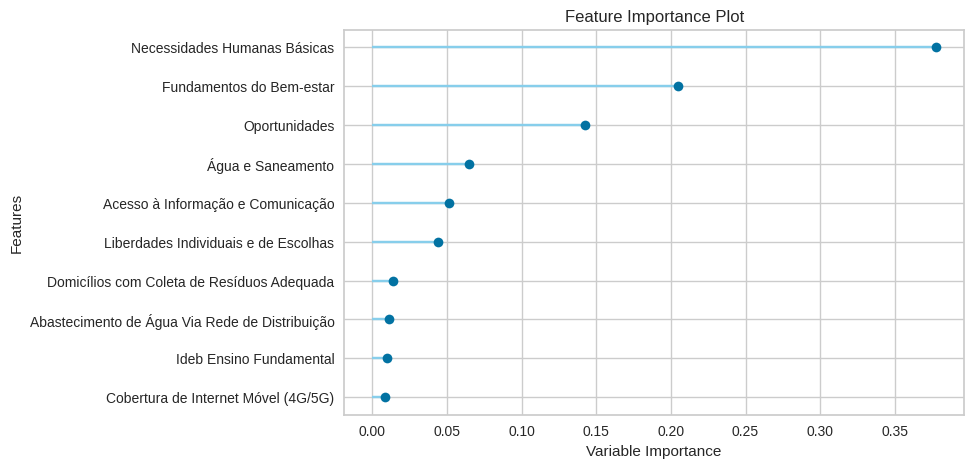

In [23]:
plot_model(et, plot = 'feature')

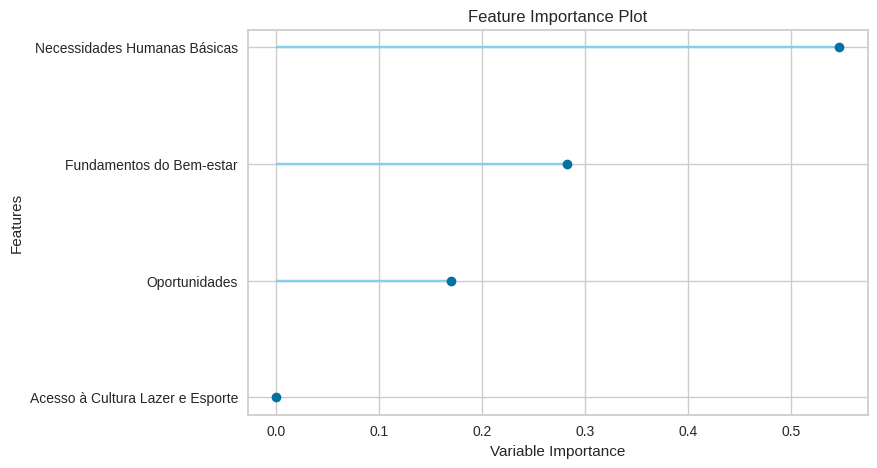

In [44]:
plot_model(gbr, plot = 'feature')

In [49]:
def plot_graphs(estimator, plot):
  plot_model(estimator, plot=plot)

In [50]:
      ## Decidi não usar o método evaluate_model, pois existem alguns gráficos que demoram vários minutos para serem gereados e também há gráficos que não são
## suportados pelo modelo mais eficiente. Então juntei aqui os gráficos mais simples e fiz separado os que demandam mais tempo de geração.
options = ['pipeline',  'parameter',  'feature', 'error', 'manifold',   'vc' , 'residuals' , 'cooks'] #, 'tree'# criar visualização iframe]
labels = ["Pipeline","HiperParameters","Feature Importance", "Prediction Error","Manifold Learning","Validation Curve" ,
          "Residuals Plot" , "Cooks Distance Plot" #,"Decision Tree"
          ]
tb = widgets.ToggleButtons(

            description="Tipo de gráfico:",
)

interact(
            plot_graphs,
            estimator=fixed(gbr),
            plot = [ (l,o) for l,o in zip(labels, options) ],
) 

interactive(children=(Dropdown(description='plot', options=(('Pipeline', 'pipeline'), ('HiperParameters', 'par…

<function __main__.plot_graphs(estimator, plot)>

In [38]:
data.columns

Index(['cod_mu', 'cod_municipio', 'nome_municipio', 'estado', 'nome_regiao',
       'capital', 'Amazônia Legal?', 'IPS Brasil',
       'Necessidades Humanas Básicas', 'Fundamentos do Bem-estar',
       'Oportunidades', 'Nutrição e Cuidados Médicos Básicos',
       'Água e Saneamento', 'Moradia', 'Segurança Pessoal',
       'Acesso ao Conhecimento Básico', 'Acesso à Informação e Comunicação',
       'Saúde e Bem-estar', 'Qualidade do Meio Ambiente',
       'Direitos Individuais', 'Liberdades Individuais e de Escolhas',
       'Inclusão Social', 'Acesso à Educação Superior',
       'População residente Censo 2022',
       'PIB Real per capita (R$/hab.) 2021 Pop Censo 2022',
       'Mortalidade Infantil até 5 anos',
       'Mortalidade Ajustada por Condições Sensíveis à Atenção Primária',
       'Hospitalizações por Condições Sensíveis à Atenção Primária',
       'Cobertura Vacinal (poliomielite)', 'Subnutrição',
       'Abastecimento de Água Via Rede de Distribuição',
       'Índice de A

In [48]:

dataset_transformed = get_config('dataset_transformed')
dataset_transformed.columns



Index(['Necessidades Humanas Básicas', 'Fundamentos do Bem-estar',
       'Oportunidades', 'Acesso à Cultura Lazer e Esporte', 'IPS Brasil'],
      dtype='object')